In [1]:
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
from splinter import Browser
import time
import pandas as pd

In [3]:
home_df = pd.read_csv("dataframes/2018_homeless_data.csv")
home_df = home_df.rename(columns={'Unnamed: 0': 'State'})
home_df.head()

State  Nighttime Residence: Doubled up  \
0     Alabama                            12021   
1      Alaska                             2257   
2     Arizona                            15049   
3    Arkansas                            10178   
4  California                           211607   

   Nighttime Residence: Hotels/motels  Nighttime Residence: Shelters  \
0                                 681                            735   
1                                 270                            920   
2                                1404                           6146   
3                                 524                           1014   
4                               10095                          17061   

   Nighttime Residence: Unsheltered  \
0                               675   
1                               337   
2                               577   
3                               268   
4                              7533   

   Persons Experiencing Chronic Homelessness  \
0                                        540   
1                                        357   
2                                       1774   
3                                        466   
4                                      34332   

   Total Family Households Experiencing Homelessness  \
0                                                280   
1                                                193   
2                                                792   
3                                                147   
4                                               6702   

   Total Homeless Population  Total Number of Homeless Students  \
0                       3434                              14112   
1                       2016                               3784   
2                       9865                              24770   
3                       2712                              11984   
4                     129972                             246296   

   Total Number of Unaccompanied Homeless Students  \
0                                              583   
1                                              877   
2                                             2850   
3                                              592   
4                                             7495   

   Unaccompanied Young Adults (Aged 18-24) Experiencing Homelessness  \
0                                                158                   
1                                                163                   
2                                                638                   
3                                                240                   
4                                              12396                   

   Veterans Experiencing Homelessness  Percentage of Homeless Population  
0                                 339                           0.622343  
1                                 132                           0.365359  
2                                 893                           1.787831  
3                                 251                           0.491495  
4                               10836                          23.554784

In [56]:
# Read csv containing median household prices for each state by year
median_hs_pr_df = pd.read_csv("../Desthy/Dataframes/State_MedianListingPrice_AllHomes.csv") 
median_hs = avg_median_hs_pr_df.rename(columns={'State':'RegionName', 'State Full Name':'State'})

In [57]:
median_hs.head()

RegionName       State  SizeRank         2010         2011         2012  \
0         CA  California         1  331354.1667  296987.5000  308158.8333   
1         TX       Texas         2  171324.5833  168918.6667  172219.1667   
2         NY    New York         3  345016.5833  317552.0000  306182.5000   
3         FL     Florida         4  187158.3333  175891.5833  179162.5000   
4         IL    Illinois         5  204158.3333  176166.6667  159783.3333   

          2013         2014         2015         2016         2017  \
0  390208.2500  418516.6667  440640.6667  479724.9167  500381.4583   
1  187101.3333  212438.3333  245033.0833  255709.7500  268202.7917   
2  305825.0000  324191.5833  330624.3333  340693.0417  352726.0417   
3  198024.1667  215341.6667  236499.0000  259156.6667  279908.7500   
4  164489.5833  180408.3333  192858.3333  202632.3333  215231.2500   

          2018       2019  
0  527849.1667  533111.25  
1  275731.6667  278067.50  
2  387716.6667  414725.00  
3  291312.1667  295975.00  
4  228915.8333  235975.00

In [58]:
median_hs[['State', '2017']].head()

State         2017
0  California  500381.4583
1       Texas  268202.7917
2    New York  352726.0417
3     Florida  279908.7500
4    Illinois  215231.2500

In [59]:
home_df22 = pd.merge(median_hs[['State', '2017']], home_df)
home_df22.head()

State         2017  Nighttime Residence: Doubled up  \
0  California  500381.4583                           211607   
1       Texas  268202.7917                            91348   
2    New York  352726.0417                            88580   
3     Florida  279908.7500                            53582   
4    Illinois  215231.2500                            42223   

   Nighttime Residence: Hotels/motels  Nighttime Residence: Shelters  \
0                               10095                          17061   
1                                8263                          11474   
2                                2623                          43102   
3                                8113                           8346   
4                                1795                           5674   

   Nighttime Residence: Unsheltered  \
0                              7533   
1                              4591   
2                              6068   
3                              2001   
4                               447   

   Persons Experiencing Chronic Homelessness  \
0                                      34332   
1                                       3404   
2                                       7195   
3                                       5302   
4                                       1625   

   Total Family Households Experiencing Homelessness  \
0                                               6702   
1                                               1917   
2                                              16368   
3                                               2757   
4                                               1223   

   Total Homeless Population  Total Number of Homeless Students  \
0                     129972                             246296   
1                      25310                             115676   
2                      91897                             140373   
3                      31030                              72042   
4                      10643                              50949   

   Total Number of Unaccompanied Homeless Students  \
0                                             7495   
1                                            18089   
2                                            11800   
3                                             6679   
4                                             5166   

   Unaccompanied Young Adults (Aged 18-24) Experiencing Homelessness  \
0                                              12396                   
1                                               1379                   
2                                               2941                   
3                                               1892                   
4                                                684                   

   Veterans Experiencing Homelessness  Percentage of Homeless Population  
0                               10836                          23.554784  
1                                1935                           4.586923  
2                                1224                          16.654464  
3                                2543                           5.623557  
4                                 804                           1.928827

In [60]:
home_df2 = home_df22.rename(columns={'2017': 'Average Median House Price'})
home_df2

State  Average Median House Price  \
0             California                 500381.4583   
1                  Texas                 268202.7917   
2               New York                 352726.0417   
3                Florida                 279908.7500   
4               Illinois                 215231.2500   
5           Pennsylvania                 192341.6667   
6                   Ohio                 152181.4167   
7               Michigan                 165650.0000   
8                Georgia                 232963.2917   
9         North Carolina                 246175.0000   
10            New Jersey                 302757.3333   
11              Virginia                 293952.0000   
12            Washington                 348058.7083   
13         Massachusetts                 418345.8333   
14               Indiana                 163323.3333   
15               Arizona                 271341.5833   
16             Tennessee                 221166.6667   
17              Missouri                 167291.6667   
18              Maryland                 302010.8750   
19             Wisconsin                 191304.1667   
20             Minnesota                 245800.0000   
21              Colorado                 401741.1667   
22               Alabama                 189645.2083   
23        South Carolina                 233463.5833   
24             Louisiana                 204673.5000   
25              Kentucky                 170027.6667   
26                Oregon                 347407.5000   
27              Oklahoma                 178523.3333   
28           Connecticut                 307275.0000   
29                  Iowa                 168470.8333   
30           Mississippi                 175650.0000   
31              Arkansas                 162429.8333   
32                Kansas                 167950.3333   
33                  Utah                 326604.1667   
34                Nevada                 285565.3333   
35            New Mexico                 219091.4167   
36         West Virginia                 152916.6667   
37              Nebraska                 194225.0000   
38                 Idaho                 267492.8333   
39                Hawaii                 600225.0000   
40                 Maine                 223954.1250   
41         New Hampshire                 276425.0000   
42          Rhode Island                 290075.0000   
43               Montana                 299127.0833   
44              Delaware                 274681.6667   
45          South Dakota                 211302.0833   
46                Alaska                 272724.0833   
47          North Dakota                 230610.0000   
48               Vermont                 244991.6667   
49  District of Columbia                 552570.8333   
50               Wyoming                 238954.1667   

    Nighttime Residence: Doubled up  Nighttime Residence: Hotels/motels  \
0                            211607                               10095   
1                             91348                                8263   
2                             88580                                2623   
3                             53582                                8113   
4                             42223                                1795   
5                             14362                                1490   
6                             22533                                1607   
7                             27923                                2514   
8                             27543                                6700   
9                             19131                                3565   
10                             8540                                 760   
11                            13425                                2749   
12                            28582                                2399   
13                             9780                     

In [61]:
State_Pop_df = pd.read_csv("dataframes/State_Population.csv") 

In [62]:
State_Pop_df_re = State_Pop_df.rename(columns={'STATE':'State'})

In [63]:
State_Pop_df_re[['State', '2017']].head()

State        2017
0     Alabama   4850771.0
1      Alaska    738565.0
2     Arizona   6809946.0
3    Arkansas   2977944.0
4  California  38982847.0

In [64]:
test_merg = pd.merge(State_Pop_df_re[['State', '2017']], home_df2)
# pd.merge(Poll_avg_df, new_Pop_df, on="Year")
test_merg = test_merg.rename(columns={'2017': '2017 Population'})

In [65]:
test_merg.head()

State  2017 Population  Average Median House Price  \
0     Alabama        4850771.0                 189645.2083   
1      Alaska         738565.0                 272724.0833   
2     Arizona        6809946.0                 271341.5833   
3    Arkansas        2977944.0                 162429.8333   
4  California       38982847.0                 500381.4583   

   Nighttime Residence: Doubled up  Nighttime Residence: Hotels/motels  \
0                            12021                                 681   
1                             2257                                 270   
2                            15049                                1404   
3                            10178                                 524   
4                           211607                               10095   

   Nighttime Residence: Shelters  Nighttime Residence: Unsheltered  \
0                            735                               675   
1                            920                               337   
2                           6146                               577   
3                           1014                               268   
4                          17061                              7533   

   Persons Experiencing Chronic Homelessness  \
0                                        540   
1                                        357   
2                                       1774   
3                                        466   
4                                      34332   

   Total Family Households Experiencing Homelessness  \
0                                                280   
1                                                193   
2                                                792   
3                                                147   
4                                               6702   

   Total Homeless Population  Total Number of Homeless Students  \
0                       3434                              14112   
1                       2016                               3784   
2                       9865                              24770   
3                       2712                              11984   
4                     129972                             246296   

   Total Number of Unaccompanied Homeless Students  \
0                                              583   
1                                              877   
2                                             2850   
3                                              592   
4                                             7495   

   Unaccompanied Young Adults (Aged 18-24) Experiencing Homelessness  \
0                                                158                   
1                                                163                   
2                                                638                   
3                                                240                   
4                                              12396                   

   Veterans Experiencing Homelessness  Percentage of Homeless Population  
0                                 339                           0.622343  
1                                 132                           0.365359  
2                                 893                           1.787831  
3                                 251                           0.491495  
4                               10836                          23.554784

In [66]:
test_merg['Percentage Homeless'] = test_merg['Total Homeless Population']/test_merg['2017 Population'] * 100

In [67]:
test_merg

State  2017 Population  Average Median House Price  \
0          Alabama        4850771.0                 189645.2083   
1           Alaska         738565.0                 272724.0833   
2          Arizona        6809946.0                 271341.5833   
3         Arkansas        2977944.0                 162429.8333   
4       California       38982847.0                 500381.4583   
5         Colorado        5436519.0                 401741.1667   
6      Connecticut        3594478.0                 307275.0000   
7         Delaware         943732.0                 274681.6667   
8          Florida       20278447.0                 279908.7500   
9          Georgia       10201635.0                 232963.2917   
10          Hawaii        1421658.0                 600225.0000   
11           Idaho        1657375.0                 267492.8333   
12        Illinois       12854526.0                 215231.2500   
13         Indiana        6614418.0                 163323.3333   
14            Iowa        3118102.0                 168470.8333   
15          Kansas        2903820.0                 167950.3333   
16        Kentucky        4424376.0                 170027.6667   
17       Louisiana        4663461.0                 204673.5000   
18           Maine        1330158.0                 223954.1250   
19        Maryland        5996079.0                 302010.8750   
20   Massachusetts        6789319.0                 418345.8333   
21        Michigan        9925568.0                 165650.0000   
22       Minnesota        5490726.0                 245800.0000   
23     Mississippi        2986220.0                 175650.0000   
24        Missouri        6075300.0                 167291.6667   
25         Montana        1029862.0                 299127.0833   
26        Nebraska        1893921.0                 194225.0000   
27          Nevada        2887725.0                 285565.3333   
28   New Hampshire        1331848.0                 276425.0000   
29      New Jersey        8960161.0                 302757.3333   
30      New Mexico        2084828.0                 219091.4167   
31        New York       19798228.0                 352726.0417   
32  North Carolina       10052564.0                 246175.0000   
33    North Dakota         745475.0                 230610.0000   
34            Ohio       11609756.0                 152181.4167   
35        Oklahoma        3896251.0                 178523.3333   
36          Oregon        4025127.0                 347407.5000   
37    Pennsylvania       12790505.0                 192341.6667   
38    Rhode Island        1056138.0                 290075.0000   
39  South Carolina        4893444.0                 233463.5833   
40    South Dakota         855444.0                 211302.0833   
41       Tennessee        6597381.0                 221166.6667   
42           Texas       27419612.0                 268202.7917   
43            Utah        2993941.0                 326604.1667   
44         Vermont         624636.0                 244991.6667   
45        Virginia        8365952.0                 293952.0000   
46      Washington        7169967.0                 348058.7083   
47   West Virginia        1836843.0                 152916.6667   
48       Wisconsin        5763217.0                 191304.1667   
49         Wyoming         583200.0                 238954.1667   

    Nighttime Residence: Doubled up  Nighttime Residence: Hotels/motels  \
0                             12021                                 681   
1                              2257                                 270   
2                             15049                                1404   
3                             10178                                 524   
4                            211607                               10095   
5                             17146                                2205   
6                              2702                                 39

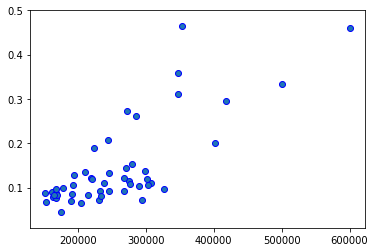

In [68]:
#should do percentage homeless population versus median house price 
#some states have larger populations so a comparison on numbers alone would not be the most accurate comparison.

plt.scatter(test_merg['Average Median House Price'], test_merg['Percentage Homeless'], marker='o', edgecolors= 'b')

In [69]:
""" use pablo's csv to create a dataframe then use dataframe data to find percentage of homelessness for each year 
after finding percentage of homelessness for each year plot percentage vs housing data from desthy. """

" use pablo's csv to create a dataframe then use dataframe data to find percentage of homelessness for each year \nafter finding percentage of homelessness for each year plot percentage vs housing data from desthy. "

In [2]:
Unemployment_df = pd.read_csv("../Desthy/Dataframes/Annual_Average_Unemployment_Rates_By_State.csv") 

In [3]:
Unemployment_df

State       State Full Name Continental US  2018  2017  2016  2015  \
0   United State         United States            Yes   3.9   4.4   4.9   5.3   
1             AL               Alabama            Yes   3.9   4.4   5.8   6.1   
2             AK                Alaska            Yes   6.6   7.0   6.9   6.5   
3             AZ               Arizona            Yes   4.8   4.9   5.4   6.1   
4             AR              Arkansas            Yes   3.7   3.7   4.0   5.0   
5             CA            California            Yes   4.2   4.8   5.5   6.2   
6             CO              Colorado            Yes   3.3   2.7   3.2   3.9   
7             CT           Connecticut            Yes   4.1   4.7   5.1   5.7   
8             DE              Delaware            Yes   3.8   4.5   4.5   4.9   
9             DC  District of Columbia            Yes   5.6   6.1   6.1   6.9   
10            FL               Florida            Yes   3.6   4.2   4.8   5.5   
11            GA               Georgia            Yes   3.9   4.7   5.4   6.0   
12            HI                Hawaii            Yes   2.4   2.4   3.0   3.6   
13            ID                 Idaho            Yes   2.8   3.2   3.8   4.2   
14            IL              Illinois            Yes   4.3   4.9   5.8   6.0   
15            IN               Indiana            Yes   3.4   3.6   4.4   4.8   
16            IA                  Iowa            Yes   2.5   3.1   3.6   3.8   
17            KS                Kansas            Yes   3.4   3.7   4.0   4.2   
18            KY              Kentucky            Yes   4.3   4.9   5.1   5.3   
19            LA             Louisiana            Yes   4.9   5.1   6.1   6.3   
20            ME                 Maine            Yes   3.4   3.4   3.8   4.4   
21            MD              Maryland            Yes   3.9   4.3   4.5   5.1   
22            MA         Massachusetts            Yes   3.3   3.8   3.9   4.8   
23            MI              Michigan            Yes   4.1   4.6   5.0   5.4   
24            MN             Minnesota            Yes   2.9   3.4   3.9   3.7   
25            MS           Mississippi            Yes   4.8   5.1   5.8   6.4   
26            MO              Missouri            Yes   3.2   3.8   4.6   5.0   
27            MT               Montana            Yes   3.7   3.9   4.1   4.2   
28            NE              Nebraska            Yes   2.8   2.9   3.1   3.0   
29            NV                Nevada            Yes   4.6   5.1   5.7   6.8   
30            NH         New Hampshire            Yes   2.5   2.7   2.9   3.4   
31            NJ            New Jersey            Yes   4.1   4.6   5.0   5.8   
32            NM            New Mexico            Yes   4.9   5.9   6.6   6.5   
33            NY              New York            Yes   4.1   4.7   4.9   5.3   
34            NC        North Carolina            Yes   3.9   4.5   5.1   5.7   
35            ND          North Dakota            Yes   2.6   2.7   3.1   2.8   
36            OH                  Ohio            Yes   4.6   5.0   5.0   4.9   
37            OK              Oklahoma            Yes   3.4   4.2   4.8   4.4   
38            OR                Oregon            Yes   4.2   4.1   4.8   5.6   
39            PA          Pennsylvania            Yes   4.3   4.9   5.4   5.3   
40            RI          Rhode Island            Yes   4.1   4.4   5.2   6.0   
41            SC        South Carolina            Yes   3.4   4.3   5.0   6.0   
42            SD          South Dakota            Yes   3.0   3.2   3.0   3.1   
43            TN             Tennessee            Yes   3.5   3.8   4.7   5.6   
44            TX                 Texas            Yes   3.9   4.3   4.6   4.4   
45            UT                  Utah            Yes   3.1   3.3   3.4   3.6   
46            VT               Vermont            Yes   2.7   3.0   3.2   3.6   
47            VA              Virginia            Yes   3.0   3.7   4.1   4.5   
48            WA            Washington    